In [67]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler

In [132]:
heart_data = pd.read_excel("Heart_Disease_Data.xlsx")
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [133]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slop          int64
ca           object
thal         object
num           int64
dtype: object

In [134]:
print("Unique values of 'ca' column:", heart_data.ca.unique())
print("Unique values of 'thal' column:", heart_data.thal.unique())

Unique values of 'ca' column: [0 3 2 1 '?']
Unique values of 'thal' column: [6 3 7 '?']


In [143]:
heart_data = heart_data.replace('?', np.nan)
heart_data['ca'] = heart_data['ca'].apply(str)
heart_data.thal = heart_data.thal.astype(str)
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slop          int64
ca           object
thal         object
num           int64
dtype: object

In [140]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
np_heart_data = imputer.fit_transform(heart_data)
imputed_heart_data = pd.DataFrame(np_heart_data)
imputed_heart_data.columns = heart_data.columns
imputed_heart_data.head()
np.isnan(np.sum(imputer.fit_transform(heart_data)))

False

In [141]:
print("Number of Instances:         ", imputed_heart_data.shape[0])
print("Number of Attritibutes:      ", imputed_heart_data.shape[1])
print("Number of Missing Values:    ", imputed_heart_data.isnull().values.sum())
print("Number of Invalid Values:    ", (imputed_heart_data[["age", "trestbps", "chol", "thalach"]] == 0).values.sum())

Number of Instances:          303
Number of Attritibutes:       14
Number of Missing Values:     0
Number of Invalid Values:     0


In [142]:
print("Unique values of 'ca' column:", imputed_heart_data.ca.unique())
print("Unique values of 'thal' column:", imputed_heart_data.thal.unique())

Unique values of 'ca' column: [0.  3.  2.  1.  0.6 1.6]
Unique values of 'thal' column: [6.  3.  7.  5.4 3.8]


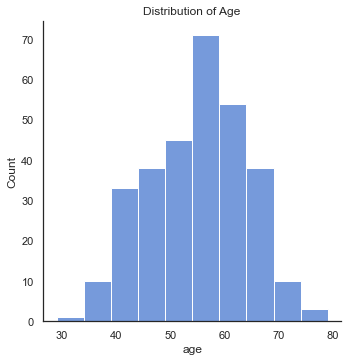

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

fig = sns.displot(heart_data["age"], binwidth = 5)
plt.title("Distribution of Age")
plt.show()

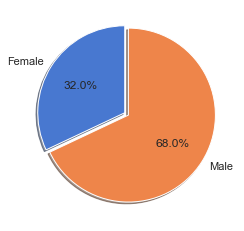

In [5]:
labels = ["Female", "Male"]
sizes = [heart_data[heart_data.sex == 0].shape[0], heart_data[heart_data.sex == 1].shape[0]]
explode = (0.05, 0)

fig_chart, sex_chart = plt.subplots()
sex_chart.pie(sizes, labels = labels, shadow = True, explode = explode, startangle = 90, autopct = '%1.1f%%')
plt.show()

In [8]:
heart_data['num'] = heart_data['num'].apply(lambda x: 1 if x != 0 else x)
print("Data Dimensions:", heart_data.shape)
heart_data.head()

Data Dimensions: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [18]:
# pd.get_dummies(data = heart_data, columns=['sex', 'cp', 'fbs', 'restecg','exang','slop','ca','thal'])
heart_data[heart_data.thal == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1


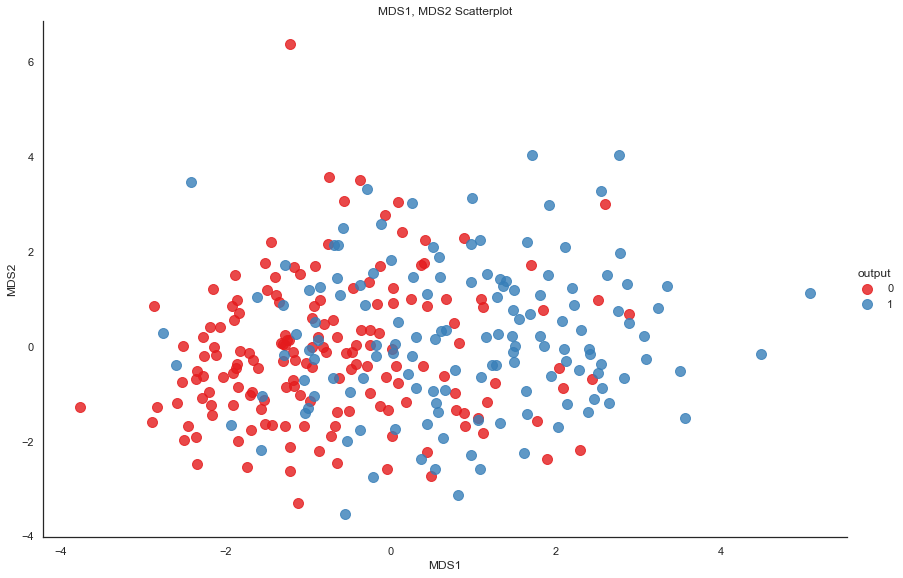

In [7]:
df_subset = heart_data[['age', 'trestbps', 'chol', 'thalach','oldpeak']]

scaler = StandardScaler()
std_df = scaler.fit_transform(df_subset)
std_df = pd.DataFrame(data = std_df)

std_df.merge(heart_data[['']])

mds = MDS(n_components=2)
df_mds = mds.fit_transform(std_df)

df_mds = pd.DataFrame(df_mds)
df_mds.columns = ['MDS1', 'MDS2']
df_mds['output'] = heart_data['num']

# sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.lmplot(data = df_mds,
                x = 'MDS1', 
                y = 'MDS2', 
                hue = 'output', 
                fit_reg=False, 
                height = 8, 
                aspect = 1.5, 
                palette="Set1", 
                scatter_kws={"s": 100})

ax = plt.title("MDS1, MDS2 Scatterplot")